In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [10]:
correlation = gold_data.corr()

<AxesSubplot:>

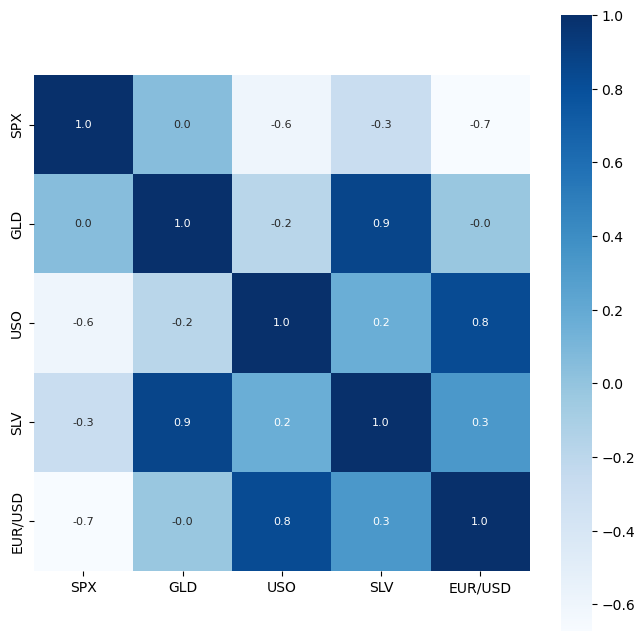

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\RASAGNA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

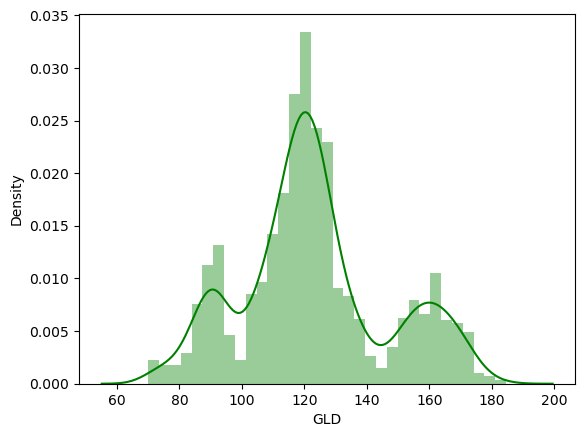

In [13]:
sns.distplot(gold_data['GLD'],color='green')

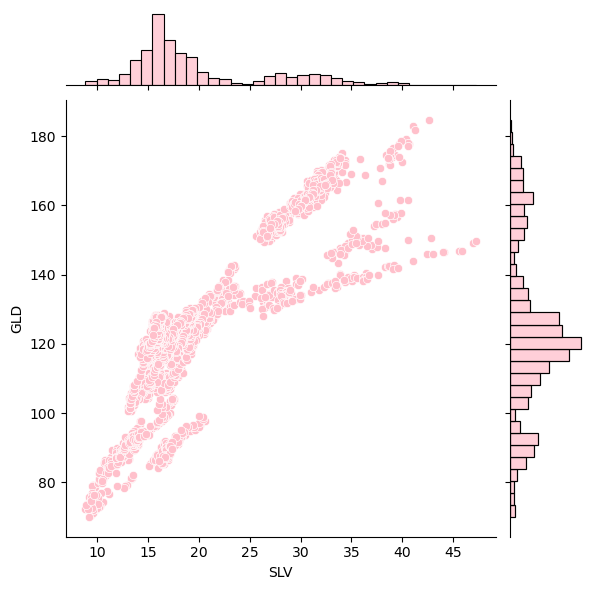

In [14]:
sns.jointplot(x=gold_data['SLV'],y=gold_data['GLD'],color='pink')

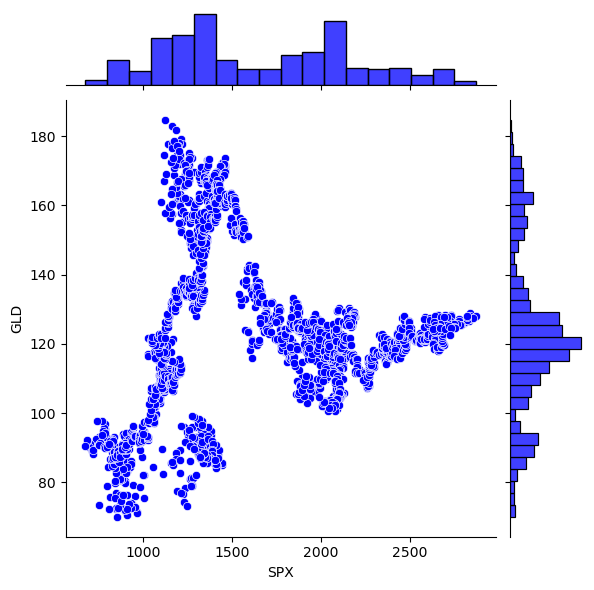

In [15]:
sns.jointplot(x=gold_data['SPX'],y=gold_data['GLD'],color='blue')

In [16]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [17]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
print(y_pred)

[168.18949909  81.87659987 115.88620003 127.66690064 120.7441011
 154.66729703 150.43789897 126.20980063 117.42079866 126.0168006
 116.81940063 171.99460085 142.05079836 167.92409874 115.23040013
 117.70050021 138.80560272 170.06780058 159.45250297 159.05659963
 155.04029974 125.28200049 176.41029927 156.97060394 125.14870054
  94.04279972  77.15740035 120.35310006 119.09419938 167.50830002
  88.06080081 125.32010065  91.45660076 117.71430015 121.14439908
 136.75930122 115.61460099 115.01080033 148.3207996  107.24220132
 104.44590212  87.16549778 126.49340086 117.77820006 153.5394991
 119.60420008 108.33420018 108.13419817  93.22650072 127.27979717
  74.74630017 113.65149918 121.44509978 111.09549895 118.90699906
 120.82929956 160.14619911 166.72790068 147.08269733  85.99909887
  94.39710058  86.80509871  90.54299978 119.05000107 126.42300042
 127.59210042 170.24649945 122.27609966 117.64599853  98.5105002
 168.1677019  142.82689841 132.24070238 121.22010241 121.40029925
 119.7477005  

In [24]:
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.9893685729511164


In [25]:
Y_test = list(Y_test)

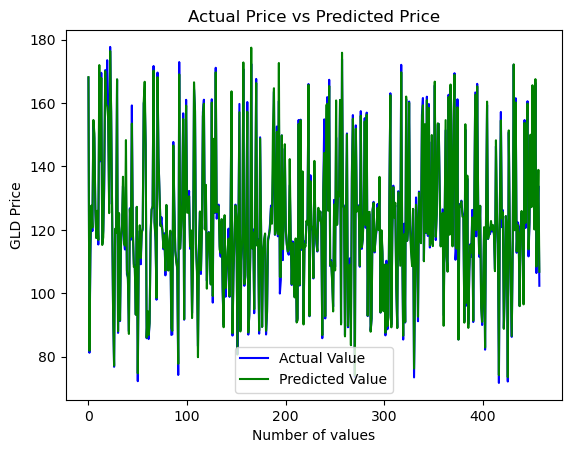

In [26]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [27]:
prediction=regressor.predict([[1447.160034,78.470001,15.180,1.471692]])

C:\Users\RASAGNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [28]:
prediction

array([85.02210012])

In [29]:
prediction=regressor.predict([[1390.189941,76.059998,15.590,1.557099]])

C:\Users\RASAGNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [30]:
prediction

array([86.39179922])

In [31]:
prediction=regressor.predict([[130.988,89.05998,90.590,17.099]])

C:\Users\RASAGNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [32]:
prediction

array([149.81139983])

In [33]:
result = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
result

,Actual,Predicted
0,168.020004,168.189499
1,81.230003,81.876600
2,112.320000,115.886200
3,127.589996,127.666901
4,119.620003,120.744101
...,...,...
453,166.380005,167.556398
454,106.379997,108.425799
455,122.239998,121.708598
456,133.830002,138.932301


In [34]:
prediction=regressor.predict([[1447.160034,78.470001,15.180,1.471692]])

C:\Users\RASAGNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [35]:
print('predicted value of gold price',prediction)

predicted value of gold price [85.02210012]


In [36]:
import joblib

In [37]:
joblib.dump(regressor,'gold_price')

['gold_price']

In [38]:
model=joblib.load('gold_price')

In [39]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()

In [42]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [43]:
model.predict(sc.transform([[1447.160034,78.470001,15.180,1.471692]]))

C:\Users\RASAGNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\RASAGNA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([77.42169893])